<a href="https://colab.research.google.com/github/shoaib247964/Mall-Customer-Segmentation/blob/main/Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the dataset
data = pd.read_csv('/content/Mall_Customers.csv')

# Display basic information about the dataset
print(data.info())
print(data.head())

# Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Rename columns for better readability (if necessary)
data.columns = ['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score']

# Drop CustomerID as it's not useful for clustering
data.drop(columns=['CustomerID'], inplace=True)

# Encode Gender column (Male: 1, Female: 0)
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

# Display basic statistics
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Missing Values:
 CustomerID                0
Gender

In [2]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 2: Normalize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert scaled data back to DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
print("Scaled Data Sample:\n", data_scaled.head())

Scaled Data Sample:
      Gender       Age  Annual_Income  Spending_Score
0  1.128152 -1.424569      -1.738999       -0.434801
1  1.128152 -1.281035      -1.738999        1.195704
2 -0.886405 -1.352802      -1.700830       -1.715913
3 -0.886405 -1.137502      -1.700830        1.040418
4 -0.886405 -0.563369      -1.662660       -0.395980


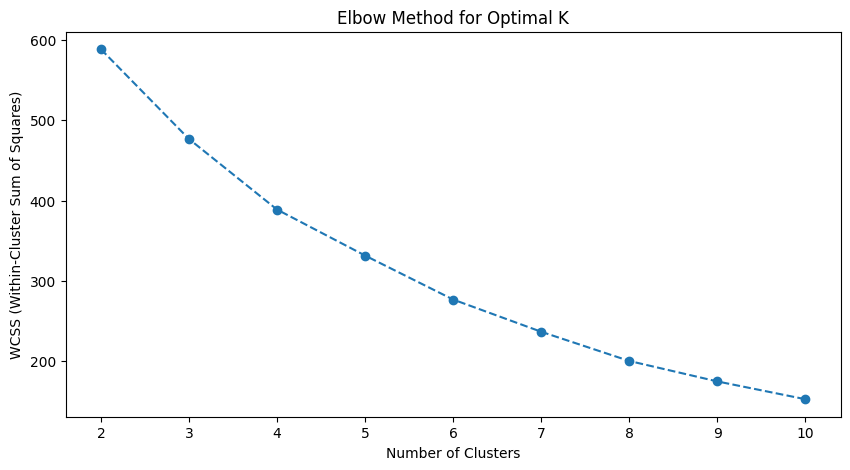

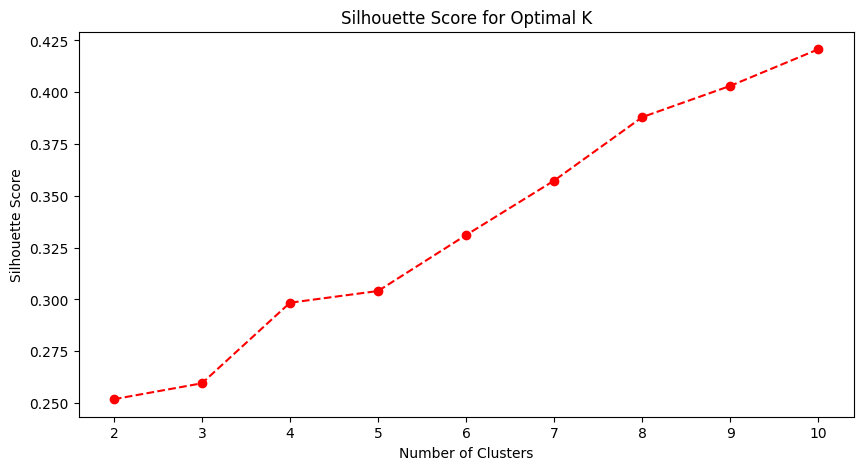

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 3: Finding the Optimal Number of Clusters
wcss = []  # Within-cluster sum of squares
silhouette_scores = []
k_range = range(2, 11)  # Testing cluster numbers from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

# Plot the Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='r')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()


Cluster Counts:
 Cluster
3    54
2    43
0    39
4    35
1    29
Name: count, dtype: int64


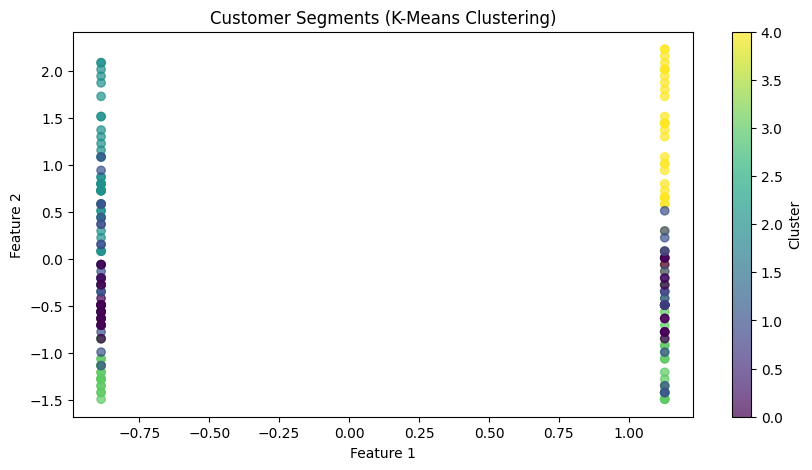

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Step 4: Apply K-Means Clustering with Optimal Number of Clusters
optimal_k = 5  # Based on Elbow & Silhouette method analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Fit the model and get cluster labels
data_scaled['Cluster'] = kmeans.fit_predict(data_scaled)

# Display cluster counts
print("Cluster Counts:\n", data_scaled['Cluster'].value_counts())

# Visualizing Clusters (Using First Two Principal Components)
plt.figure(figsize=(10, 5))
plt.scatter(data_scaled.iloc[:, 0], data_scaled.iloc[:, 1], c=data_scaled['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Customer Segments (K-Means Clustering)')
plt.colorbar(label='Cluster')
plt.show()


Cluster Characteristics:
            Gender        Age  Annual_Income  Spending_Score
Cluster                                                    
0        0.461538  32.692308      86.538462       82.128205
1        0.448276  36.482759      89.517241       18.000000
2        0.000000  49.813953      49.232558       40.069767
3        0.407407  24.907407      39.722222       61.203704
4        1.000000  55.714286      53.685714       36.771429


<Figure size 1200x600 with 0 Axes>

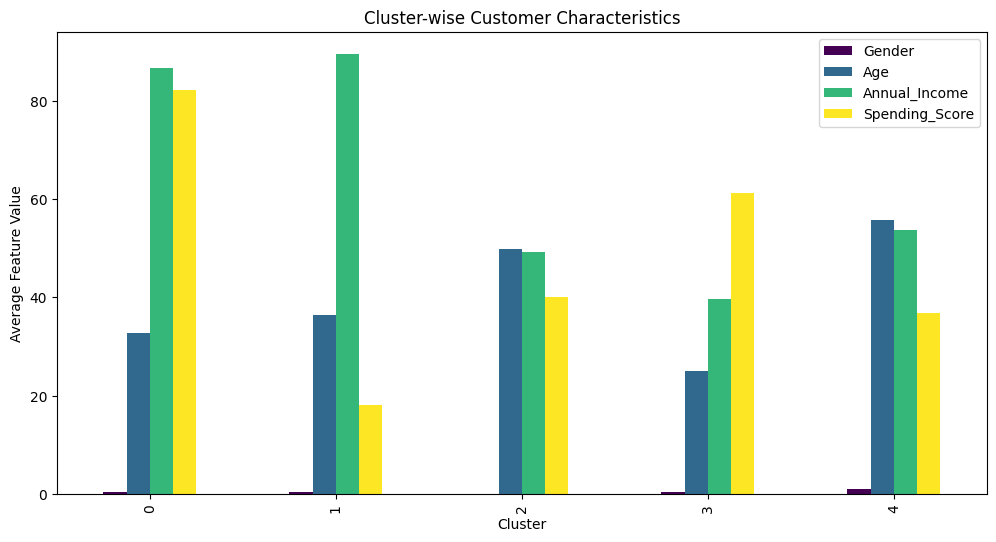

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Step 5: Interpret Customer Segments
cluster_summary = data.copy()
cluster_summary['Cluster'] = data_scaled['Cluster']

# Calculate average values per cluster
cluster_means = cluster_summary.groupby('Cluster').mean()
print("Cluster Characteristics:\n", cluster_means)

# Visualizing cluster characteristics
plt.figure(figsize=(12, 6))
cluster_means.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.xlabel('Cluster')
plt.ylabel('Average Feature Value')
plt.title('Cluster-wise Customer Characteristics')
plt.legend(loc='best')
plt.show()


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Step 6: Business Insights and Conclusions

insights = {
    0: "Cluster 0: Young customers with high spending scores, ideal for premium promotions.",
    1: "Cluster 1: Older customers with moderate income and spending, focus on loyalty programs.",
    2: "Cluster 2: High-income customers with controlled spending, potential for exclusive offers.",
    3: "Cluster 3: Low-income customers with low spending, need cost-effective engagement strategies.",
    4: "Cluster 4: Middle-income customers with varying spending patterns, suitable for balanced marketing.",
}

# Print insights for each cluster
for cluster, description in insights.items():
    print(f"{description}\n")

# Final Summary
print("\nKey Takeaways:")
print("1. High-spending young customers (Cluster 0) should be targeted for premium products.")
print("2. Older customers (Cluster 1) might respond well to loyalty rewards.")
print("3. Wealthy but controlled spenders (Cluster 2) could be offered exclusive deals.")
print("4. Budget-conscious customers (Cluster 3) need discount-based engagement.")
print("5. Middle-income customers (Cluster 4) require a mix of strategies.")


Cluster 0: Young customers with high spending scores, ideal for premium promotions.

Cluster 1: Older customers with moderate income and spending, focus on loyalty programs.

Cluster 2: High-income customers with controlled spending, potential for exclusive offers.

Cluster 3: Low-income customers with low spending, need cost-effective engagement strategies.

Cluster 4: Middle-income customers with varying spending patterns, suitable for balanced marketing.


Key Takeaways:
1. High-spending young customers (Cluster 0) should be targeted for premium products.
2. Older customers (Cluster 1) might respond well to loyalty rewards.
3. Wealthy but controlled spenders (Cluster 2) could be offered exclusive deals.
4. Budget-conscious customers (Cluster 3) need discount-based engagement.
5. Middle-income customers (Cluster 4) require a mix of strategies.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Step 7: Clustering Evaluation Metrics
silhouette_avg = silhouette_score(data_scaled.drop(columns=['Cluster']), data_scaled['Cluster'])
davies_bouldin = davies_bouldin_score(data_scaled.drop(columns=['Cluster']), data_scaled['Cluster'])
calinski_harabasz = calinski_harabasz_score(data_scaled.drop(columns=['Cluster']), data_scaled['Cluster'])

# Print Evaluation Results
print("Clustering Evaluation Metrics:")
print(f"Silhouette Score: {silhouette_avg:.4f} (Higher is better, max = 1)")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f} (Lower is better)")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f} (Higher is better)")


Clustering Evaluation Metrics:
Silhouette Score: 0.3041 (Higher is better, max = 1)
Davies-Bouldin Index: 1.1672 (Lower is better)
Calinski-Harabasz Index: 68.9646 (Higher is better)


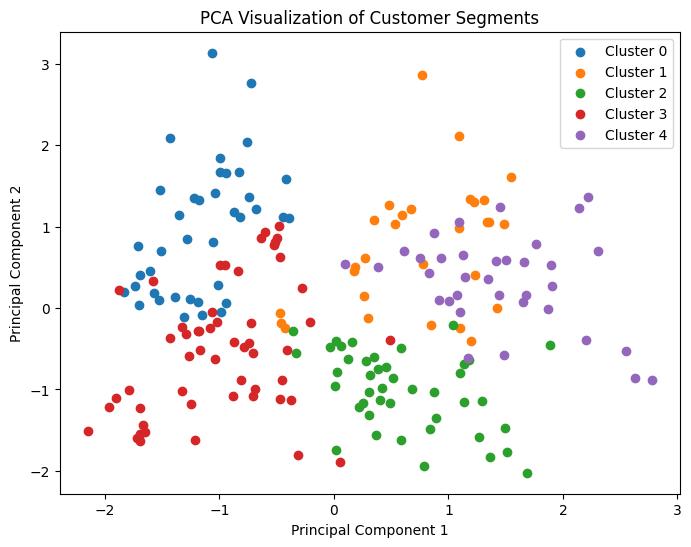

Clustering Evaluation After PCA:
Silhouette Score: 0.2085 (Higher is better, max = 1)
Davies-Bouldin Index: 1.3944 (Lower is better)
Calinski-Harabasz Index: 101.5590 (Higher is better)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Step 8: Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)  # Reduce to 2 principal components
pca_transformed = pca.fit_transform(data_scaled.drop(columns=['Cluster']))

# Convert PCA result into DataFrame
pca_df = pd.DataFrame(pca_transformed, columns=['PC1', 'PC2'])
pca_df['Cluster'] = data_scaled['Cluster']

# Visualizing PCA results
plt.figure(figsize=(8, 6))
for cluster in np.unique(pca_df['Cluster']):
    plt.scatter(pca_df[pca_df['Cluster'] == cluster]['PC1'],
                pca_df[pca_df['Cluster'] == cluster]['PC2'], label=f'Cluster {cluster}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Customer Segments')
plt.legend()
plt.show()

# Step 9: Re-evaluate Clustering Performance After PCA
silhouette_avg = silhouette_score(pca_df[['PC1', 'PC2']], pca_df['Cluster'])
davies_bouldin = davies_bouldin_score(pca_df[['PC1', 'PC2']], pca_df['Cluster'])
calinski_harabasz = calinski_harabasz_score(pca_df[['PC1', 'PC2']], pca_df['Cluster'])

# Print Evaluation Results After PCA
print("Clustering Evaluation After PCA:")
print(f"Silhouette Score: {silhouette_avg:.4f} (Higher is better, max = 1)")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f} (Lower is better)")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f} (Higher is better)")

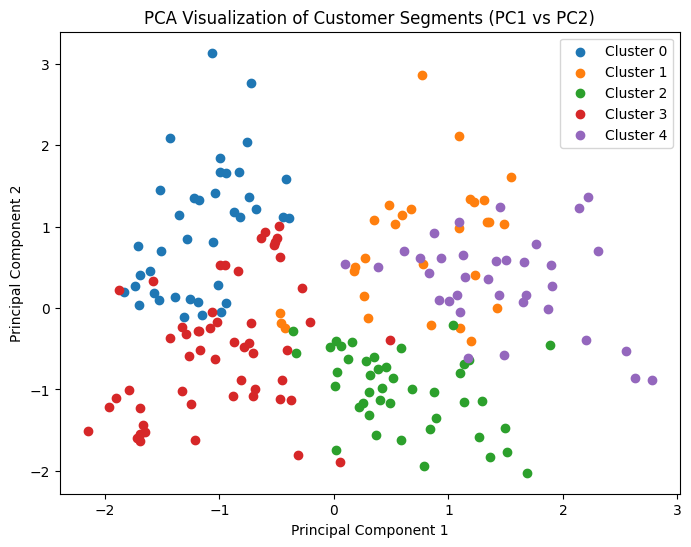

Clustering Evaluation After PCA (4 Components):
Silhouette Score: 0.3041 (Higher is better, max = 1)
Davies-Bouldin Index: 1.1672 (Lower is better)
Calinski-Harabasz Index: 68.9646 (Higher is better)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Step 8: Apply PCA for Dimensionality Reduction
pca = PCA(n_components=4)  # Reduce to 4 principal components
pca_transformed = pca.fit_transform(data_scaled.drop(columns=['Cluster']))

# Convert PCA result into DataFrame
pca_df = pd.DataFrame(pca_transformed, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df['Cluster'] = data_scaled['Cluster']

# Visualizing PCA results (First 2 Components)
plt.figure(figsize=(8, 6))
for cluster in np.unique(pca_df['Cluster']):
    plt.scatter(pca_df[pca_df['Cluster'] == cluster]['PC1'],
                pca_df[pca_df['Cluster'] == cluster]['PC2'], label=f'Cluster {cluster}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Customer Segments (PC1 vs PC2)')
plt.legend()
plt.show()

# Step 9: Re-evaluate Clustering Performance After PCA with 4 Components
silhouette_avg = silhouette_score(pca_df[['PC1', 'PC2', 'PC3', 'PC4']], pca_df['Cluster'])
davies_bouldin = davies_bouldin_score(pca_df[['PC1', 'PC2', 'PC3', 'PC4']], pca_df['Cluster'])
calinski_harabasz = calinski_harabasz_score(pca_df[['PC1', 'PC2', 'PC3', 'PC4']], pca_df['Cluster'])

# Print Evaluation Results After PCA
print("Clustering Evaluation After PCA (4 Components):")
print(f"Silhouette Score: {silhouette_avg:.4f} (Higher is better, max = 1)")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f} (Lower is better)")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f} (Higher is better)")
